In [1]:
from google.colab import drive   
drive.mount('/content/gdrive')  # change working path of google colab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/My Drive/Colab Notebooks/20191119_D001Q1"
import os
os.chdir(path)
!ls   #確認path已經到local目錄

Day001_read_image_HW.ipynb		Day004_geometric_transform_HW.ipynb
Day001_read_image_Sample.ipynb		Day004_Sample.ipynb
Day002_change_color_space_HW.ipynb	Day005_draw_HW.ipynb
Day002_change_color_space_Sample.ipynb	Day005_Sample.ipynb
Day003_color_spave_op_HW.ipynb		Part01
Day003_color_spave_op_Sample.ipynb


#  作業

Hint: 人物原始邊框座標 (60, 40), (420, 510)

請根據 Lena 圖做以下處理

- 對明亮度做直方圖均衡處理
- 水平鏡像 + 縮放處理 (0.5 倍)
- 畫出人物矩形邊框

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [182]:
img_file = 'Part01/GF_4.jpg'
img = cv2.imread(img_file)
img.shape

(3216, 2000, 3)

## Hint: 矩形

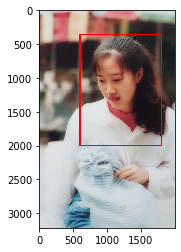

In [183]:
img_rect = img.copy()
cv2.rectangle(img_rect, (600, 360), (1800, 2000), (0, 0, 255), 20)

img_rgb_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_rect)


## Hint: 線

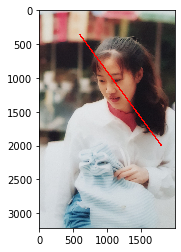

In [184]:
img_line = img.copy()
cv2.line(img_line, (600, 360), (1800, 2000), (0, 0, 255), 20)

img_rgb_line = cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_line)

## Hint: 文字

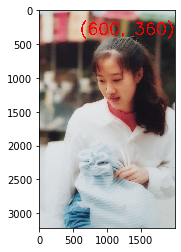

In [185]:
img_text = img.copy()
cv2.putText(img_text, '(600, 360)', (600, 360), 0, 8, (0, 0, 255), 20)

img_rgb_text = cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_text)

img_hw = img.copy()
point1 = [60, 40]
point2 = [420, 510]##  解法二

如果希望得知矩型邊框的位置

1. 顏色的操作 (對明亮度做直方圖均衡)
2. 鏡像可以透過四則運算得知
3. 透過建構 transformation matrix 做縮放
4. 把矩型邊框的點與 transformation matrix 相乘就會得到縮放後的位置
5. 畫圖

得到的圖的結果正確，同時也知道新的矩型邊框座標點

In [0]:
img_hw = img.copy()
point1 = [600, 360]
point2 = [1800, 2000]

"""
對明亮度做直方圖均衡
"""
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)

# 對明亮度做直方圖均衡 -> 對 HSV 的 V 做直方圖均衡

# 將圖片轉回 RGB
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_HSV2RGB)

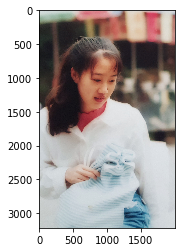

In [193]:
"""
水平鏡像
"""
h, w = img_hw.shape[:2]

# 圖片鏡像
img_hw = img_hw[:, ::-1, :]
plt.imshow(img_hw)

In [0]:
#from numpy import *
# 透過四則運算計算鏡像後位置
# 確保點的位置一樣是左上跟右下，所以交換鏡像後的 x 座標 (y 座標做水平鏡像後位置不變)
point1_h = point1;
point2_h = point2;
point1_h[0] = w - point2[0]; point1_h[1] = point1[1];
point2_h[0] = w - point1[0]; point2_h[1] = point2[1];

point1_h=tuple(point1_h)
point2_h=tuple(point2_h)

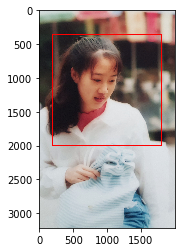

In [195]:
img_rect = img_hw.copy()  #要加這行, rectangle才不會有error message "Layout of the output array img is incompatible"
img_rect = cv2.rectangle(img_rect, point1_h, point2_h, (255, 0, 0), 20)
plt.imshow(img_rect)

In [0]:
img_hw = img.copy()
"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
resize_col = int(img_hw.shape[1]*fx)
resize_row = int(img_hw.shape[0]*fy)
# 建構 scale matrix
M_affine =np.array(([fx,0,0],[0, fy,0]), dtype=np.float32)

In [0]:
new_h, new_w=np.array((img.shape[1]*fy, img.shape[0]*fx),dtype=np.int32)

In [0]:
img_hw = cv2.warpAffine(img, M_affine, (new_h, new_w))

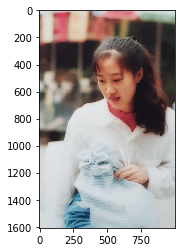

In [199]:
img_hw_rgb = cv2.cvtColor(img_hw, cv2.COLOR_BGR2RGB)
plt.imshow(img_hw_rgb)

In [200]:
M_scale = M_affine[:,:-1]
M_scale

array([[0.5, 0. ],
       [0. , 0.5]], dtype=float32)

In [201]:
# 把左上跟右下轉為矩陣型式
bbox = np.array((point1, point2), dtype=np.float32)
print('M_scale.shape={}, bbox.shape={}'.format(M_scale.shape, bbox.shape))

M_scale.shape=(2, 2), bbox.shape=(2, 2)


In [202]:
bbox.T

array([[ 200., 1800.],
       [ 360., 2000.]], dtype=float32)

In [203]:
M_scale

array([[0.5, 0. ],
       [0. , 0.5]], dtype=float32)

In [204]:
# 做矩陣乘法可以使用 `np.dot`, 為了做矩陣乘法, 
# 把bbox轉置成([x1,x2],[y1,y2])再和M_scale相乘. M_scale = ([fx,0],[0,fy])
homo_coor_result = np.dot(M_scale, bbox.T)
homo_coor_result = homo_coor_result.T.astype('uint16')
homo_coor_result

array([[ 100,  180],
       [ 900, 1000]], dtype=uint16)

In [205]:
#print(homo_coor_result)
scale_point1 = tuple(homo_coor_result[0])
scale_point2 = tuple(homo_coor_result[1])
print('origin point1={}, origin point2={}'.format(point1, point2))
print('resize point1={}, resize point2={}'.format(scale_point1, scale_point2))

origin point1=[200, 360], origin point2=[1800, 2000]
resize point1=(100, 180), resize point2=(900, 1000)


In [0]:
# 畫圖
img_rect1 = cv2.rectangle(img_hw, scale_point1, scale_point2, (0, 0, 255), 9)
img_rgb_rect1 = cv2.cvtColor(img_rect1, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_rect)


##  解法三 (optional)

把矩型邊框用遮罩的方式呈現，使用同樣處理圖片的方式處理遮罩
最後再找遮罩的左上跟右下的點的位置

這邊會用到許多沒提過的東西，所以當作 optional